*Hello, Nous allons ici implementer un model de ML basé sur l'algorithme KNN*

**Puisque les données sont déjà dans un dataset sous une forme exploitable, nous allons juste nous contenter des autres étapes: 

1. Prétraitement des données --> les donnnées sont chargées dans le projet 
2. Division des données en deux parties(non égales). Une pour l'entrainement et une pour le test
3. Choix du meilleur K (nombre de classe) pour notre modèle
4. Application de ce K afin d'entrainner notre modèle
5. Validation des performances du modèle
6. Reglage des hyperparametres 
7. Prediction. Là on commence à utiliser notre modèle


Nous allons donc utiliser l'algorithme KNN pour la classification des donnees de Diabétique. 

A la fin, on poura donc faire une prediction sur l'appartenance d'une personne Lamda, Diabetique ou pas.

In [5]:
# Pour la suppression des warnings en Python 

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importation des librairies necessaires.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

In [6]:
#Chargement du dataset
data = pd.read_csv('./../dataset/diabetes.csv')
# Il est à noter que notre Dataset est trouvé sur Internet. Donc aucune certitude sur les données. 
# On utilise juste dans le cadre des études, pas pour des fins professionnelles. 

In [7]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Description du dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.shape

(768, 9)

In [10]:
#on se rend compte qu'il y a outliers dans notre dataset qui sont BloodPressure , BMI, SkinThickness qui ont des valeurs nulles ce qui n'est pas normal
#selection des lignes presentant des problemes
data_problems_rows = data[(data['BloodPressure'] == 0) | (data['BMI'] == 0) |(data['SkinThickness'] == 0)]

In [11]:
data_problems_rows.head()
data_problems_rows.shape

(231, 9)

In [12]:
data.shape

(768, 9)

In [13]:
#nettoyage du dataset en 2 sous-dataset 
#le data_reject pour presenter un dataset dont les lignes ayant les features BloodPressure, BMI, SkinThickness qui sont egales 
#a zero ont ete supprimees
#le data_replace pour remplacer valeur BloodPressure , BMI , SkinThickness null par la moyenne de leur colonne
data_reject = data[(data['BloodPressure'] != 0) & (data['BMI'] != 0) & (data['SkinThickness'] != 0)]
data_reject.head()
data_replace  = data
columns = ['BloodPressure', 'SkinThickness', 'BMI'] 
for col in columns :
    val = data[col].mean()
    data_replace[col] = data[col].replace(0, val)
data_reject.shape

(537, 9)

In [14]:
#Normalisation du data_reject
data_reject_n=(data_reject-data_reject.min())/(data_reject.max()-data_reject.min())
data_reject_n.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.558140,0.304348,0.000000,0.314928,0.232120,0.483333,1.0
1,0.058824,0.427136,0.488372,0.239130,0.000000,0.171779,0.113919,0.166667,0.0
3,0.058824,0.447236,0.488372,0.173913,0.111111,0.202454,0.035118,0.000000,0.0
4,0.000000,0.688442,0.186047,0.304348,0.198582,0.509202,0.943469,0.200000,1.0
6,0.176471,0.391960,0.302326,0.271739,0.104019,0.261759,0.069807,0.083333,1.0


In [15]:
#normalisation du data_replace
data_replace_n=(data_replace-data_replace.min())/(data_replace.max()-data_replace.min())
data_replace_n.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.489796,0.304348,0.000000,0.314928,0.234415,0.483333,1.0
1,0.058824,0.427136,0.428571,0.239130,0.000000,0.171779,0.116567,0.166667,0.0
2,0.470588,0.919598,0.408163,0.147135,0.000000,0.104294,0.253629,0.183333,1.0
3,0.058824,0.447236,0.428571,0.173913,0.111111,0.202454,0.038002,0.000000,0.0
4,0.000000,0.688442,0.163265,0.304348,0.198582,0.509202,0.943638,0.200000,1.0


In [16]:
#Extraction des features et des target pour le data_reject et le data_replace
X_replace_n = data_replace_n.drop("Outcome",axis = 1)
y_replace_n = data_replace_n.Outcome
X_reject_n = data_reject_n.drop("Outcome",axis = 1)
y_reject_n = data_reject_n.Outcome 

In [17]:
#Divison des donnees en 2 parties , donnees d'entrainement et donnees test
X_train_replace,X_test_replace,y_train_replace,y_test_replace = train_test_split(X_replace_n,y_replace_n,test_size=0.3,random_state=42, stratify=y_replace_n)
X_train_reject,X_test_reject,y_train_reject,y_test_reject = train_test_split(X_reject_n,y_reject_n,test_size=0.3,random_state=42, stratify=y_reject_n)

[0.7402597402597403, 0.70995670995671, 0.7186147186147186, 0.70995670995671, 0.70995670995671, 0.7229437229437229, 0.7402597402597403, 0.7359307359307359, 0.7402597402597403]


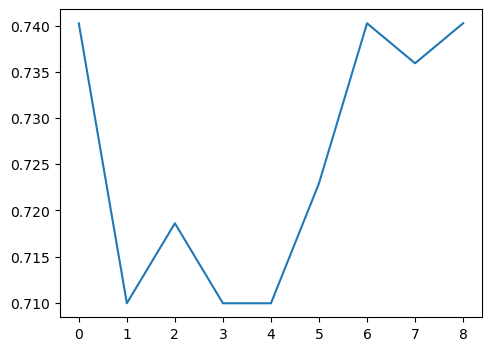

In [19]:
#recherche de la meilleure valeur pour le parametre k 
#entrainement de l'algorithme
#evaluation du score de chaque valeur de k
test_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_replace,y_train_replace)
    test_scores.append(knn.score(X_test_replace,y_test_replace))
    
print(test_scores)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(test_scores)
plt.show()

In [97]:
test_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_reject,y_train_reject)
    
    test_scores.append(knn.score(X_test_reject,y_test_reject))
    
print(test_scores)

[0.7469135802469136, 0.7037037037037037, 0.7839506172839507, 0.7469135802469136, 0.7839506172839507, 0.7716049382716049, 0.7654320987654321, 0.7777777777777778, 0.7962962962962963]


In [98]:
#comparaison des scores des 2 sous-datasets
knn_9 = KNeighborsClassifier(9)
knn_9.fit(X_train_reject,y_train_reject) 
print(knn_9.score(X_test_reject,y_test_reject))
knn_9.fit(X_train_replace,y_train_replace) 
print(knn_9.score(X_test_replace,y_test_replace))

0.7962962962962963
0.7402597402597403


In [103]:
#on se rend compte que malgre le fait qu'on ai retire certaines donnees dans le dataset de depart ,
#l'algorithme de knn avec le data_reject nous fournir un meilleur resultat que celui avec le data_replace